In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/Belphegorus86/lab-cleaning-categorical-data/master/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"

customer_df = pd.read_csv(url)

customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
customer_df.set_index('Customer', inplace=True)

In [7]:
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])

print("Numerical DataFrame:")
print(numerical_df.head())

Numerical DataFrame:
          Customer Lifetime Value  Income  Monthly Premium Auto  \
Customer                                                          
BU79786               2763.519279   56274                    69   
QZ44356               6979.535903       0                    94   
AI49188              12887.431650   48767                   108   
WW63253               7645.861827       0                   106   
HB64268               2813.692575   43836                    73   

          Months Since Last Claim  Months Since Policy Inception  \
Customer                                                           
BU79786                        32                              5   
QZ44356                        13                             42   
AI49188                        18                             38   
WW63253                        18                             65   
HB64268                        12                             44   

          Number of Open Complai

In [8]:
categorical_df = customer_df.select_dtypes(include=['object', 'category'])

print("\nCategorical DataFrame:")
print(categorical_df.head())


Categorical DataFrame:
               State Response  Coverage Education Effective To Date  \
Customer                                                              
BU79786   Washington       No     Basic  Bachelor           2/24/11   
QZ44356      Arizona       No  Extended  Bachelor           1/31/11   
AI49188       Nevada       No   Premium  Bachelor           2/19/11   
WW63253   California       No     Basic  Bachelor           1/20/11   
HB64268   Washington       No     Basic  Bachelor            2/3/11   

         EmploymentStatus Gender Location Code Marital Status     Policy Type  \
Customer                                                                        
BU79786          Employed      F      Suburban        Married  Corporate Auto   
QZ44356        Unemployed      F      Suburban         Single   Personal Auto   
AI49188          Employed      F      Suburban        Married   Personal Auto   
WW63253        Unemployed      M      Suburban        Married  Corporate 

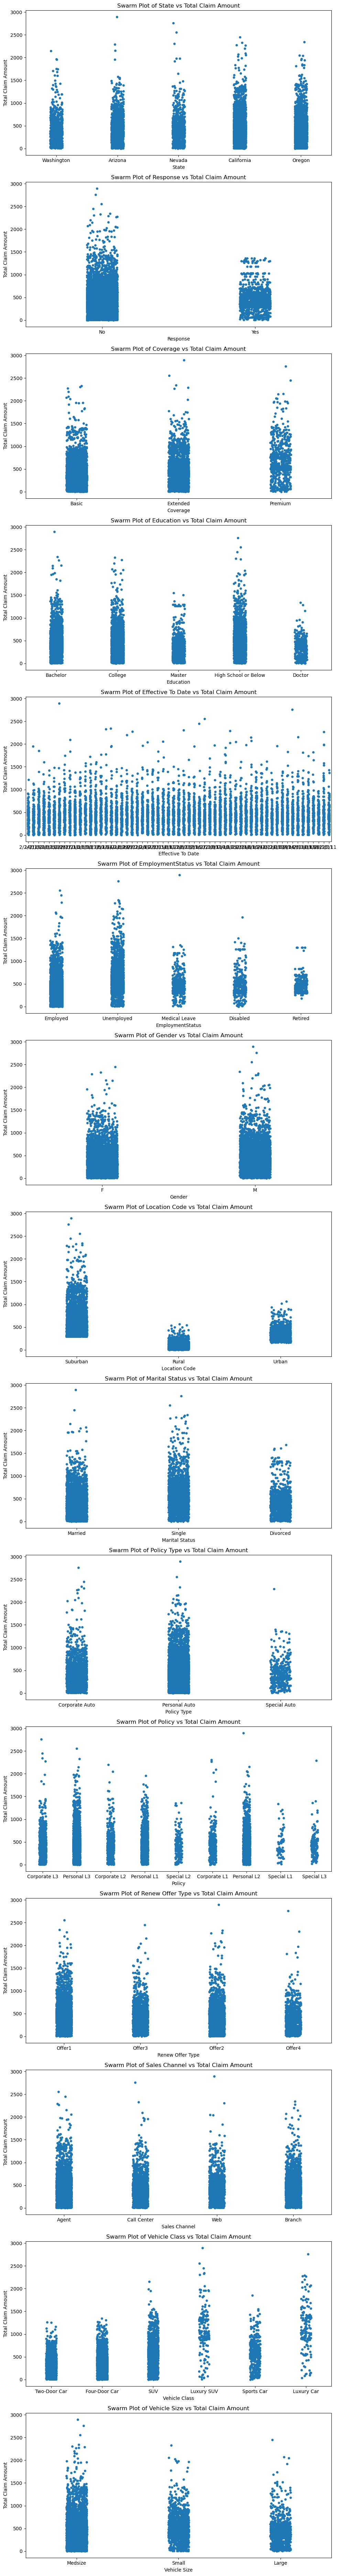

In [10]:
categorical_columns = customer_df.select_dtypes(include=['object', 'category']).columns

target_variable = 'Total Claim Amount'

fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 5 * len(categorical_columns)))

for i, variable in enumerate(categorical_columns):
    sns.stripplot(x=variable, y=target_variable, data=customer_df, ax=axes[i], size=5)
    axes[i].set_title(f'Swarm Plot of {variable} vs {target_variable}')

plt.tight_layout()
plt.show()

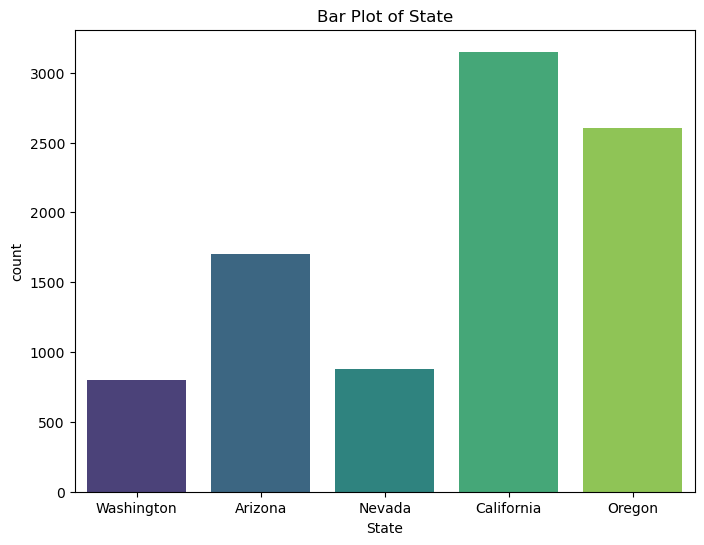

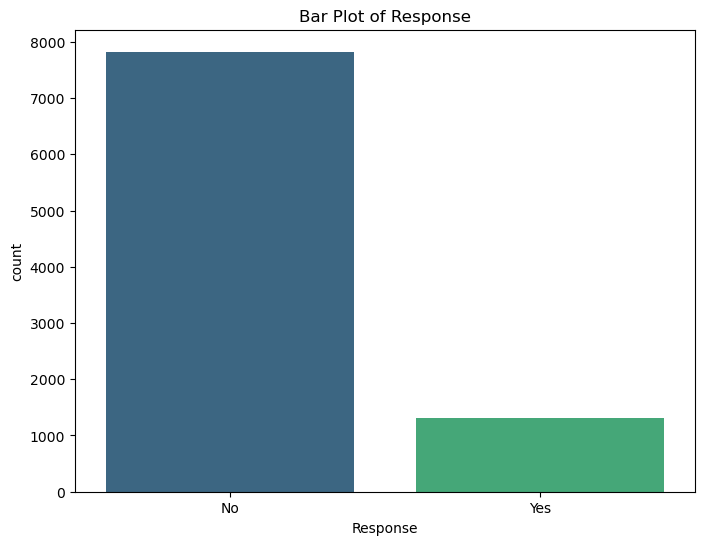

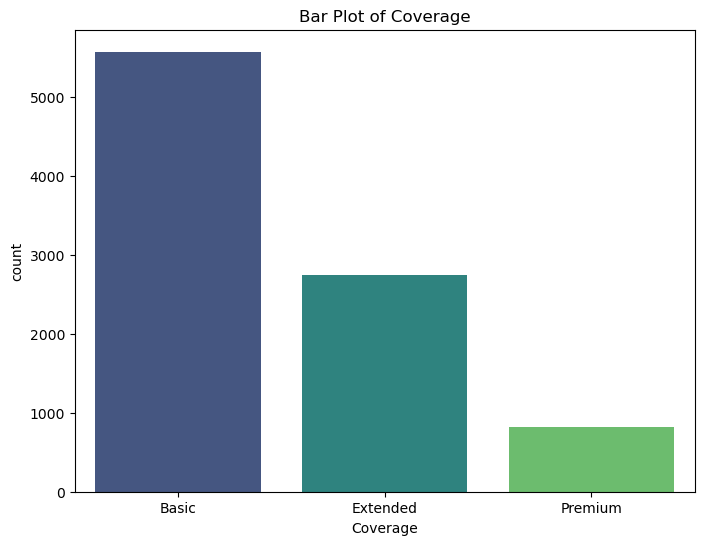

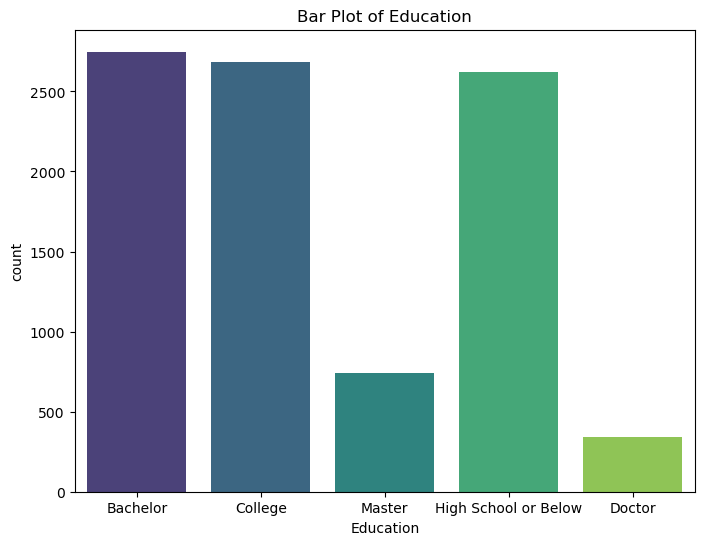

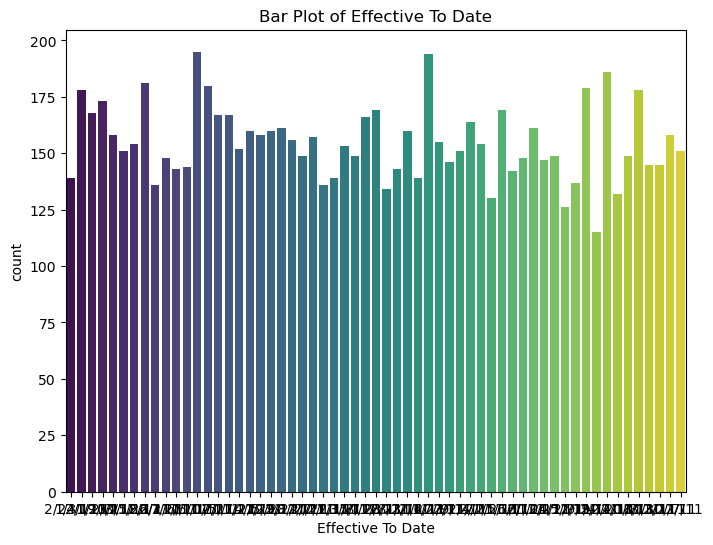

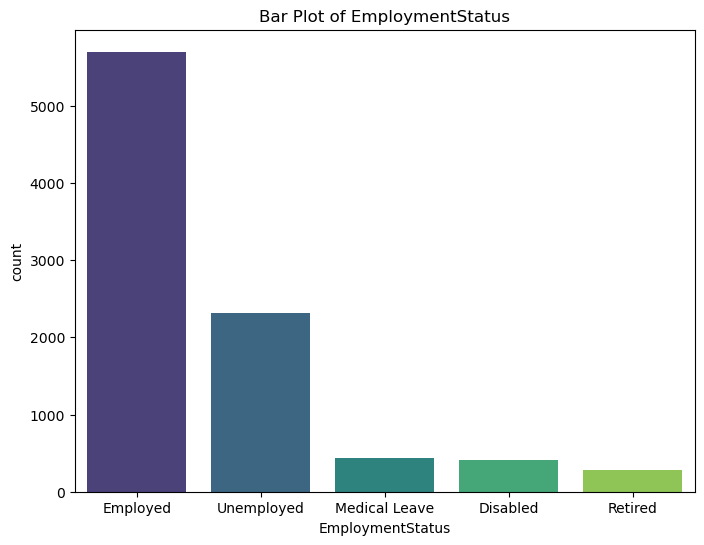

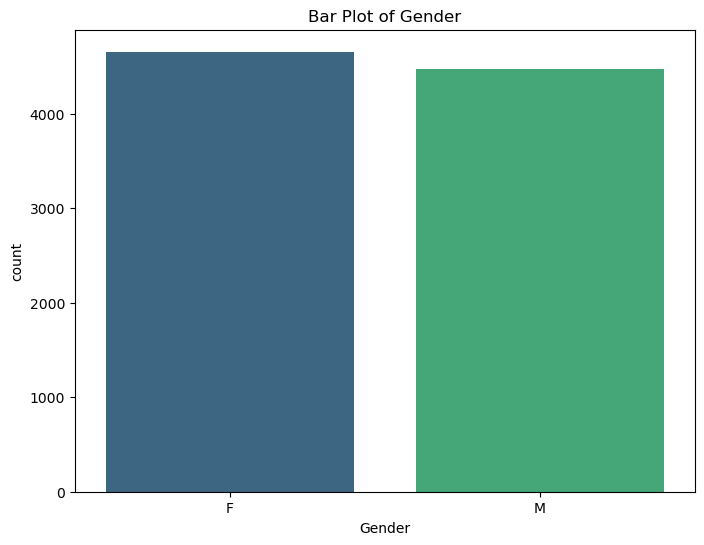

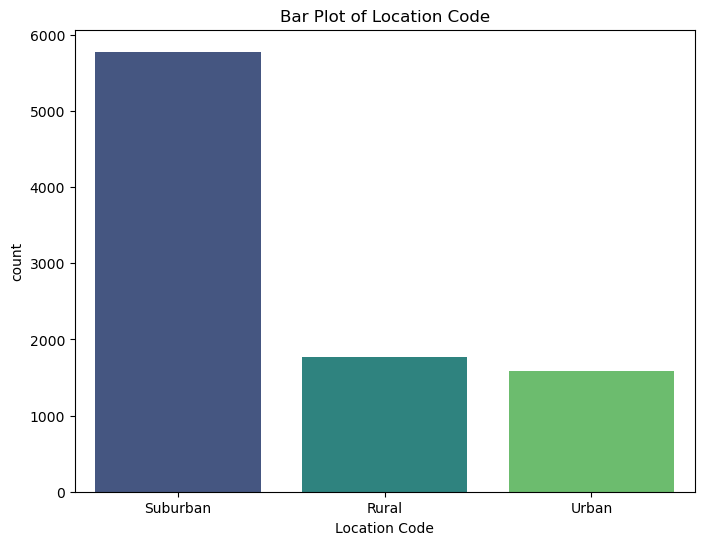

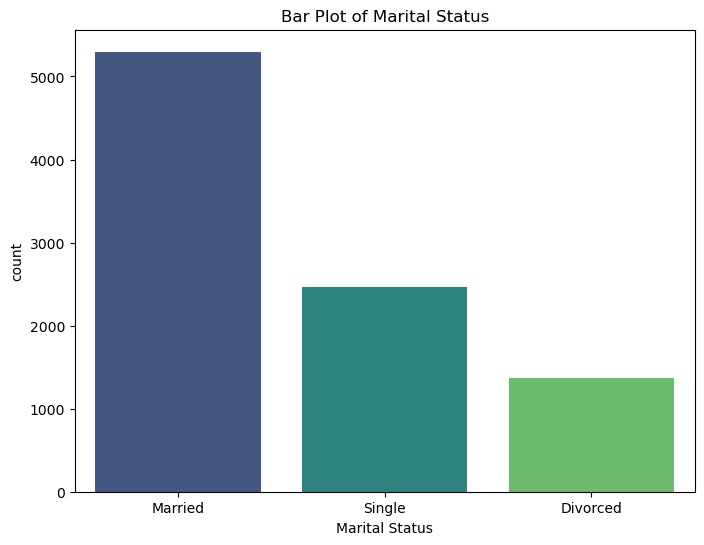

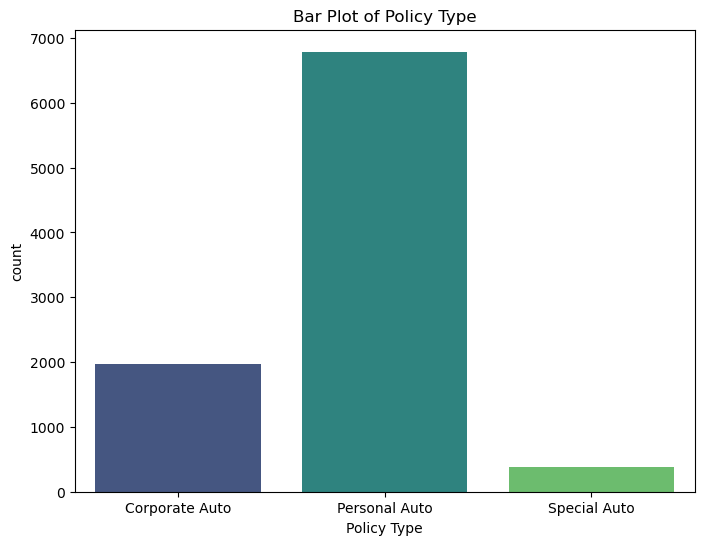

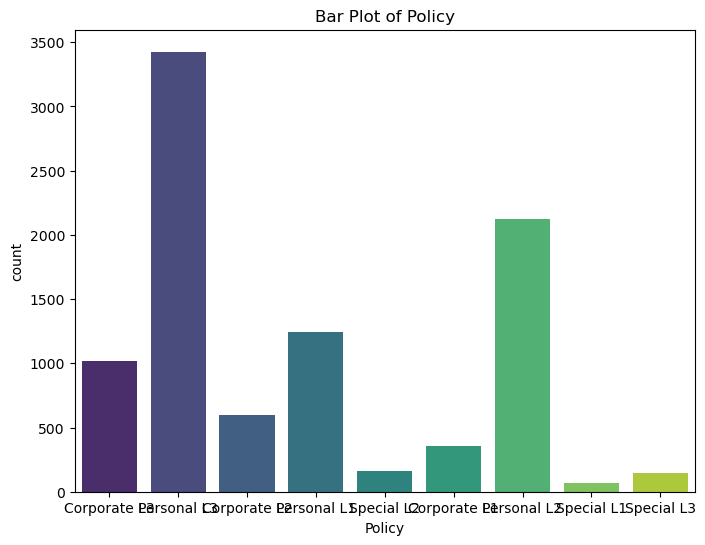

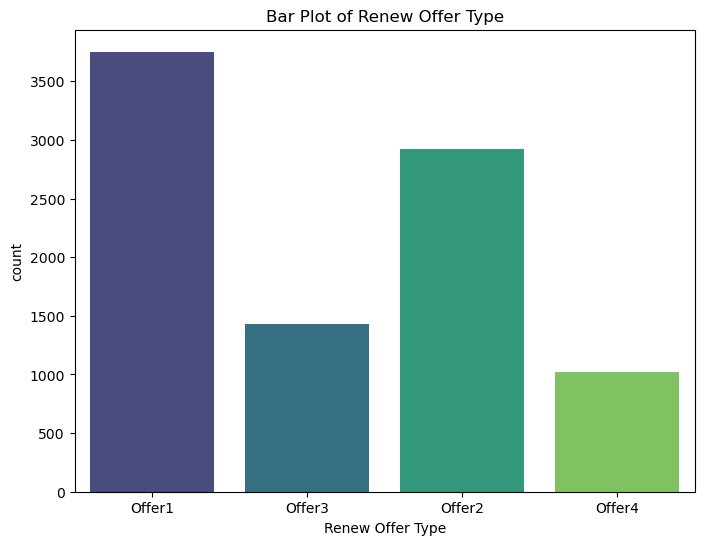

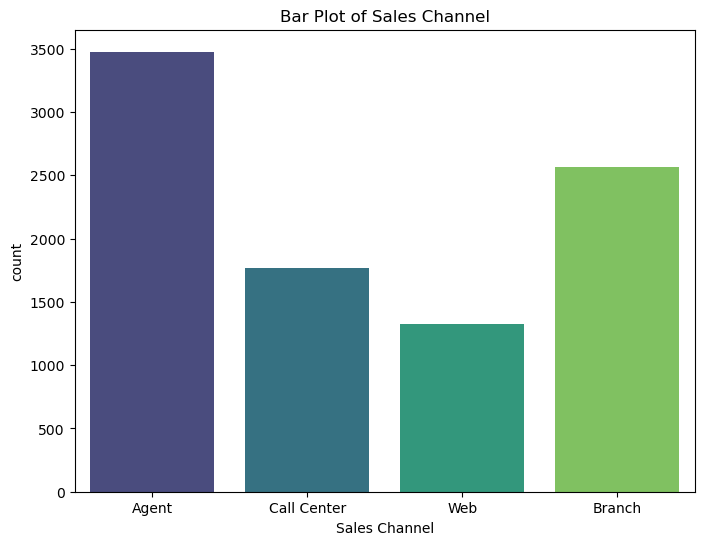

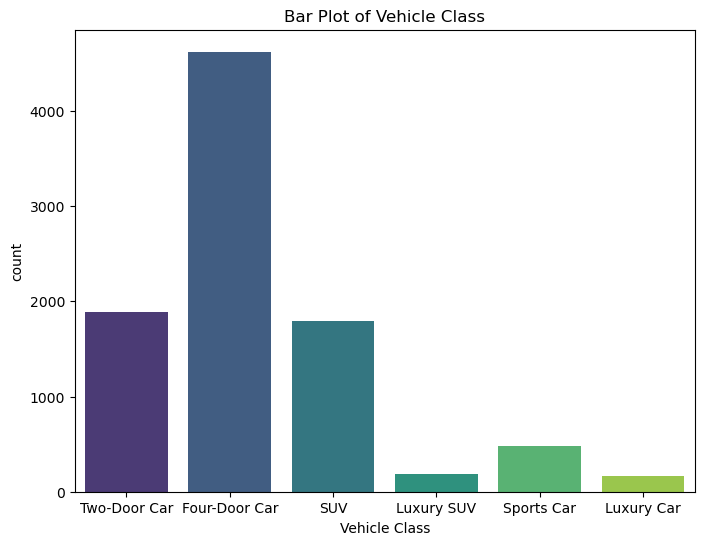

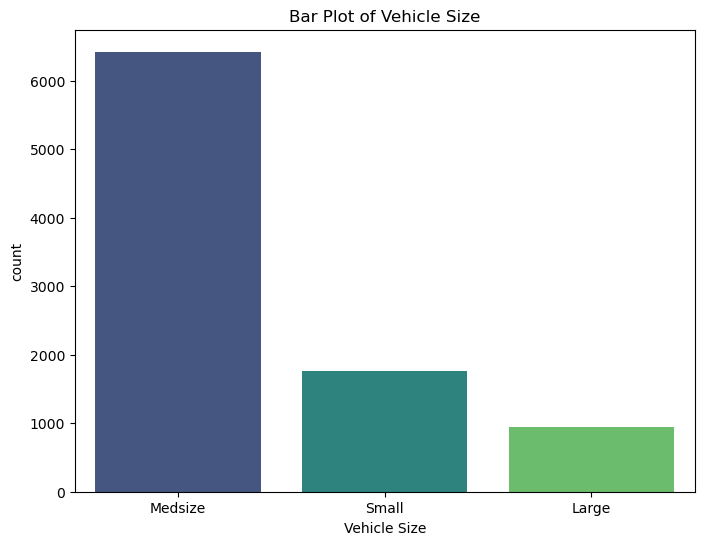

In [15]:
categorical_df = customer_df[categorical_columns].copy()

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=categorical_df, palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.show()

In [11]:
for column in categorical_columns:
    print(customer_df[column].value_counts())

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
Response
No     7826
Yes    1308
Name: count, dtype: int64
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/

In [16]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_4804\4285178242.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])


In [17]:
customer_df['Month'] = customer_df['Effective To Date'].dt.month
customer_df['Year'] = customer_df['Effective To Date'].dt.year

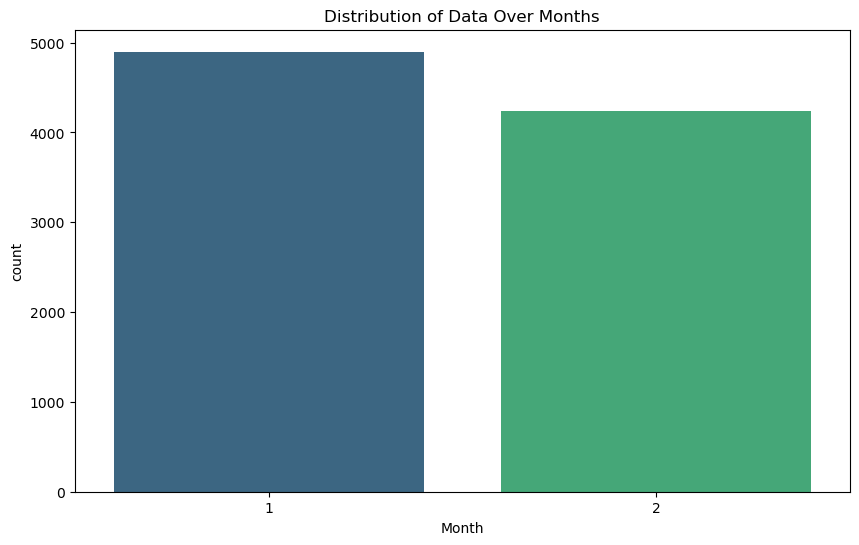

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=customer_df, palette='viridis')
plt.title('Distribution of Data Over Months')
plt.show()

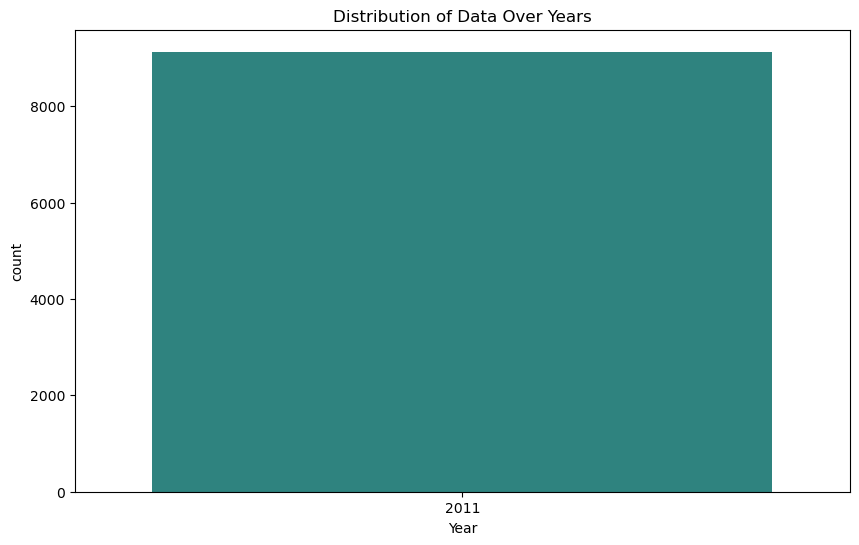

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=customer_df, palette='viridis')
plt.title('Distribution of Data Over Years')
plt.show()